In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import requests


# Загрузка данных.
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

# Обработка данных.
for df in [df_test]:
    df.replace(to_replace=' bhp', value=0, inplace=True)
    df['max_torque_rpm'] = df['torque'].str.split().str[1]
    df['torque'] = df['torque'].str.split().str[0]
    df[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']] =\
        df[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']].apply(
            lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
            axis=0
        )
    df['mileage'] = df['mileage'].astype(float)
    df['engine'] = df['engine'].astype(float)
    df['max_power'] = df['max_power'].astype(float)
    df['brand'] = df['name'].str.split().str[0]
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df.replace(r'\,', '.', regex=True, inplace=True)
    df.drop(columns=['name', 'selling_price'], inplace=True)

# Выгрузка данных.
df_test.to_csv('../data/test.csv', index=False)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [2]:
item = df_test.sample(1).to_json(orient='records')[1:-1]


request = requests.post(
    url='http://127.0.0.1:8000/predict_item',
    data=item
)


print(request.text)

651075.3028349662


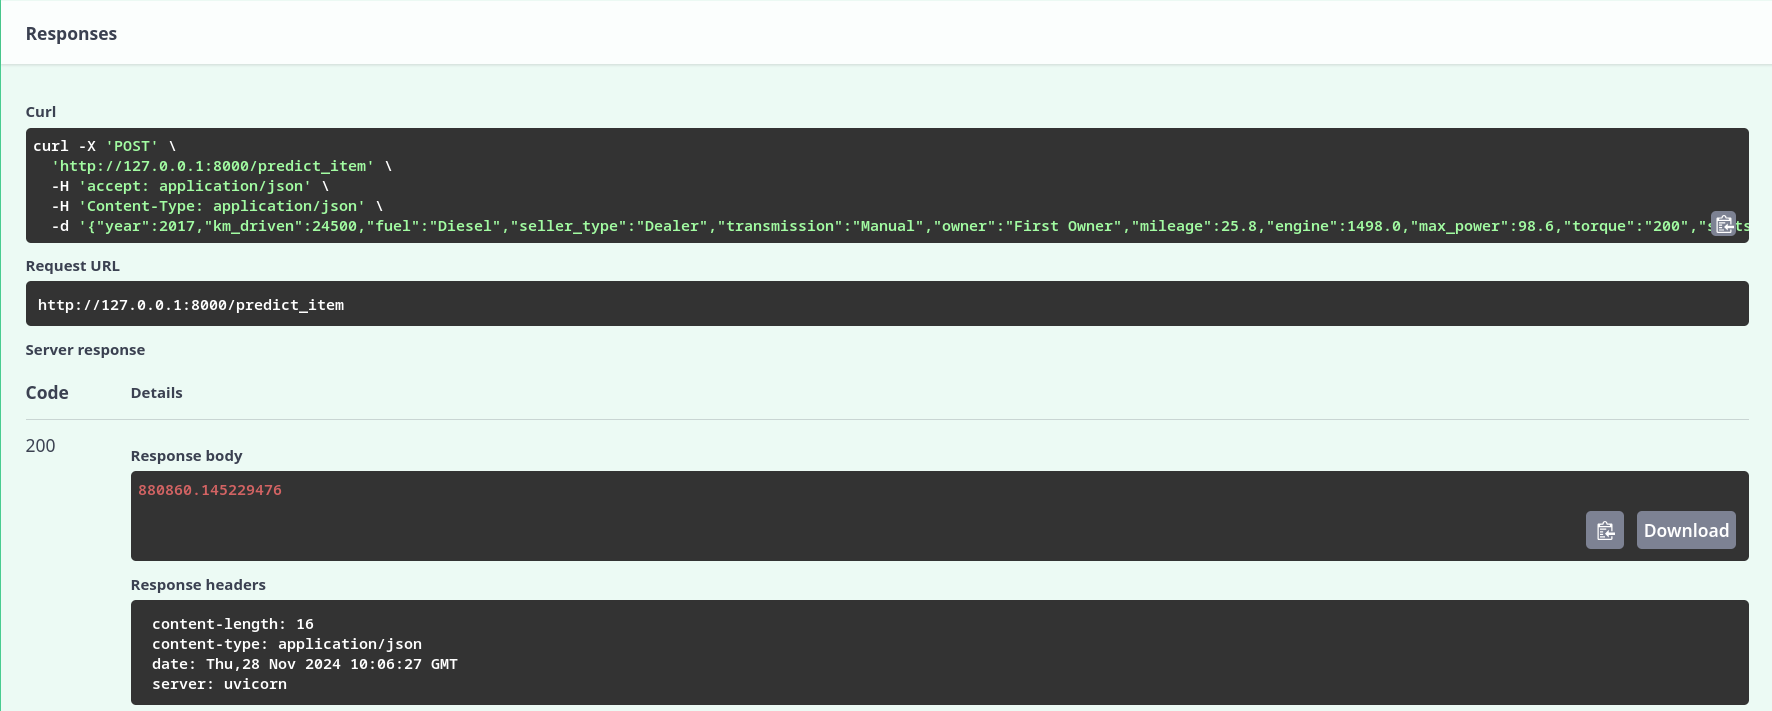

In [3]:
with open('../data/test.csv', 'rb') as csv:
    response = requests.post(
        url='http://127.0.0.1:8000/predict_items', 
        files={'csv': csv},
    )

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [4]:
pd.read_csv('../data/predicted_data.csv').head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,brand,prediction
0,2010,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,NaN,Mahindra,401202.613174
1,2017,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,15002750,Tata,807517.406930
2,2007,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,4300,Honda,-86794.838354
3,2015,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0,1750,Honda,458302.412552
4,2011,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0,NaN,Tata,-48115.226031


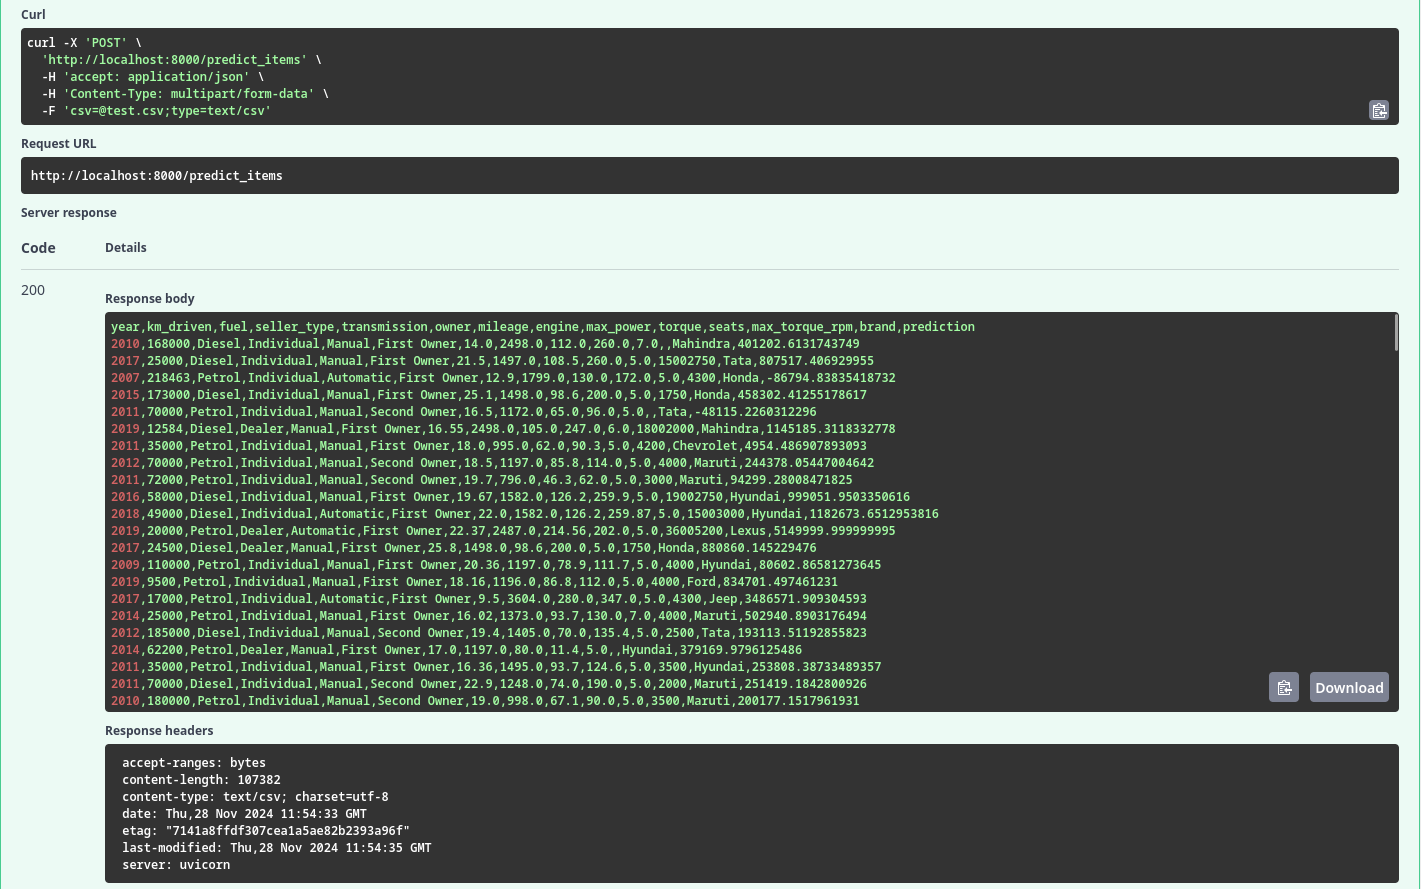

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Это кот @malyushitsky